In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('./wine-clustering.csv')

In [3]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.isnull().mean()*100

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

### Univariate Analysis

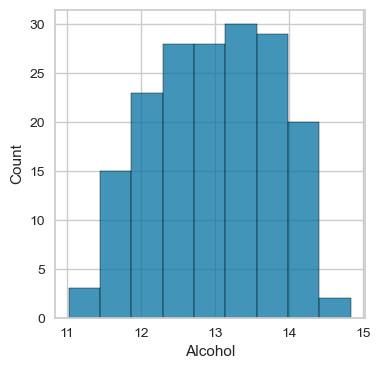

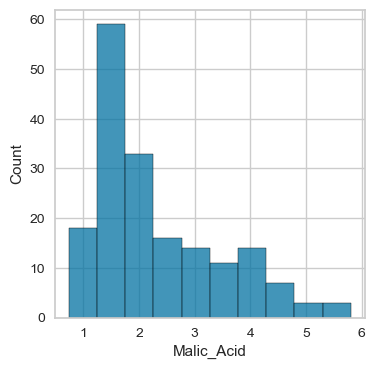

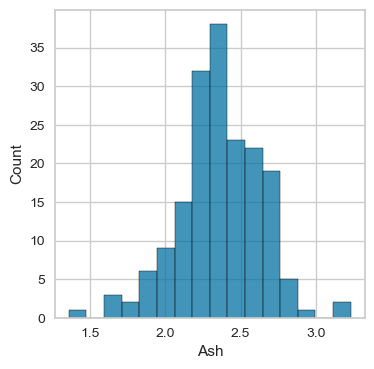

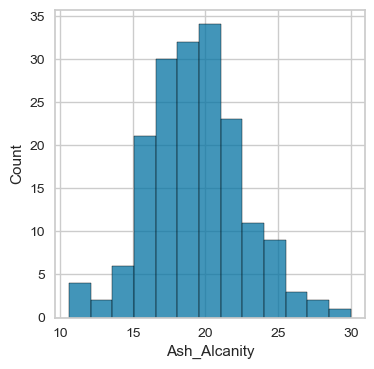

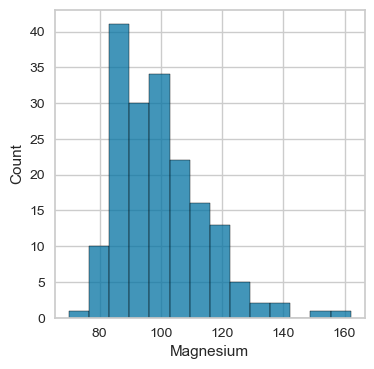

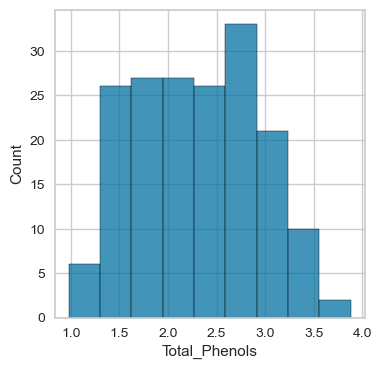

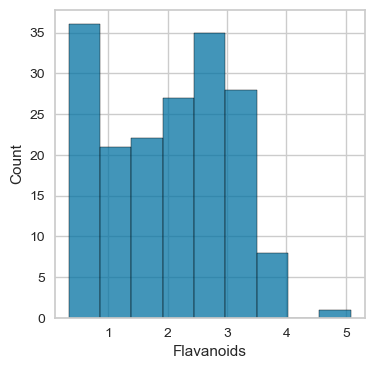

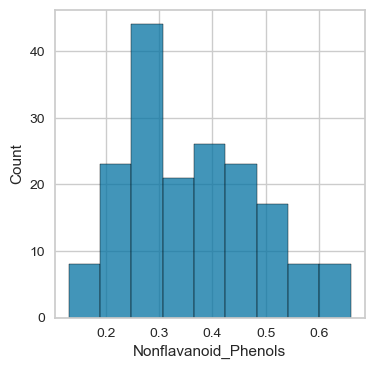

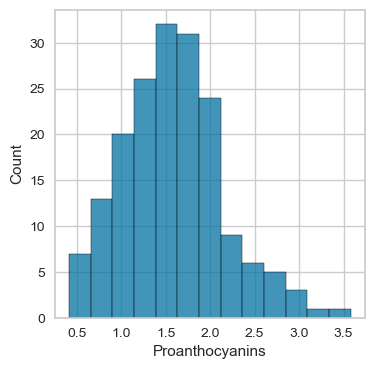

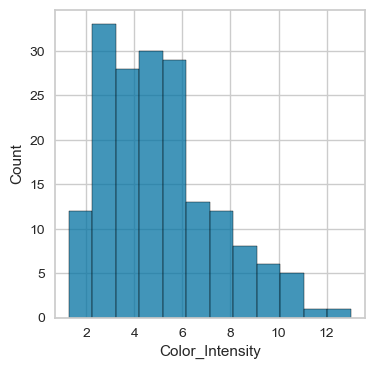

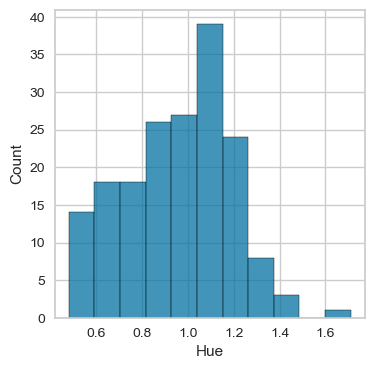

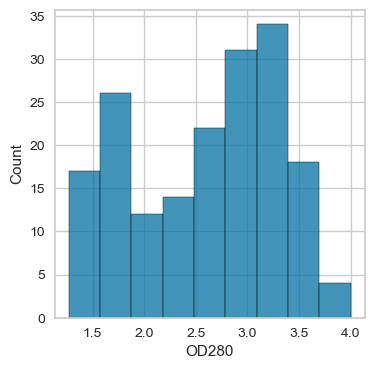

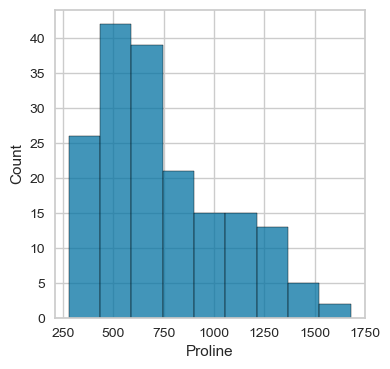

In [8]:
for i in data:
    plt.figure(figsize=(4,4))
    sns.histplot(data = data , x = i)
    plt.show()

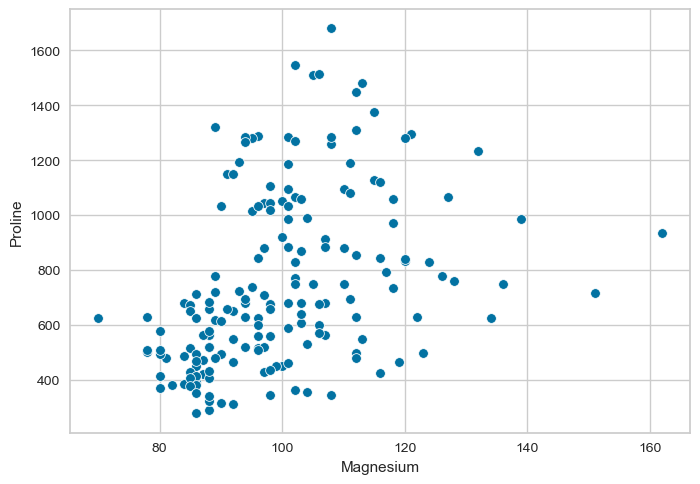

In [9]:
sns.scatterplot(data=data,x='Magnesium',y='Proline')
plt.show()

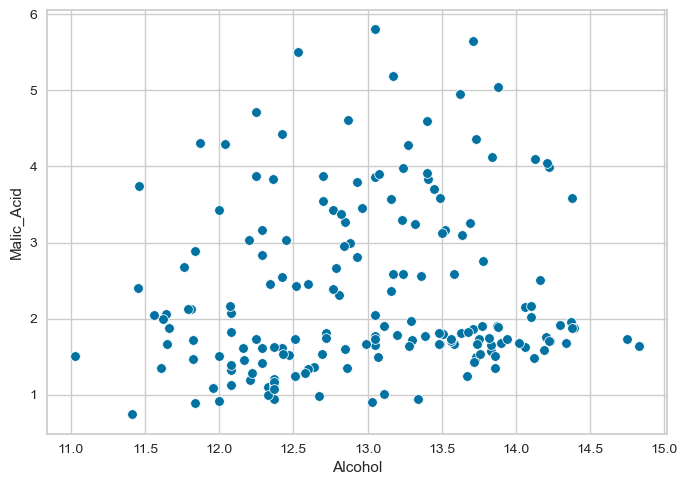

In [10]:
sns.scatterplot(data=data,x='Alcohol',y='Malic_Acid')
plt.show()

## Kmeans  modelling

#### The Elbow method

In [11]:
k_mean_yellowbrick=KMeans()

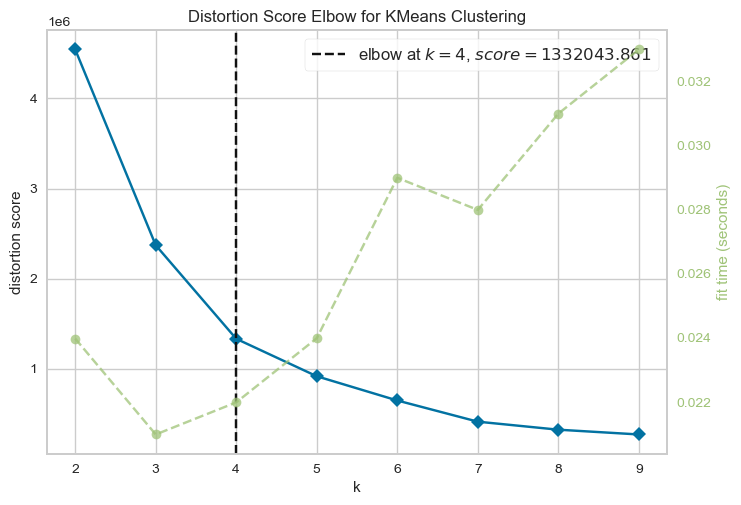

In [12]:

graph=KElbowVisualizer(k_mean_yellowbrick,k = range(2,10))
graph.fit(data)
graph.poof();

In [13]:
KM=KMeans(n_clusters=4,random_state=42)

In [14]:
KM.fit(data)

KMeans(n_clusters=4, random_state=42)

###  Adding the cluster_id  to dataframe

In [15]:
labels=KM.labels_

In [16]:
data['cluster_id']=labels

In [17]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,3
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,3
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,3
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


#### Silhouette score

In [18]:
silhouette_score(data,labels)

0.5572568962577635

### plotting the cluster

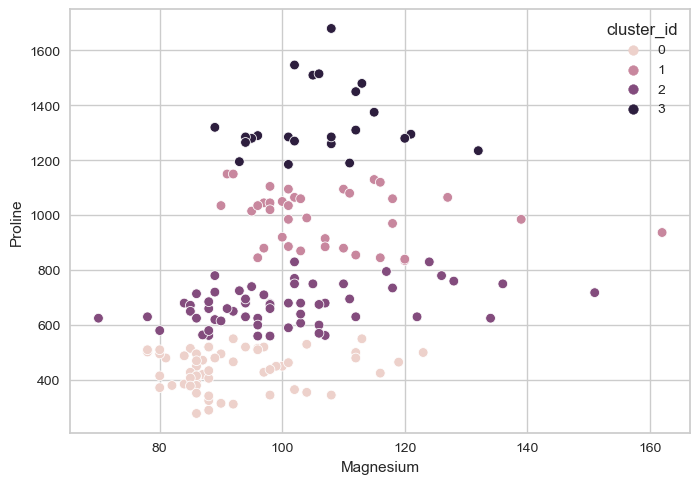

In [19]:
sns.scatterplot(data=data,x='Magnesium',y='Proline',hue='cluster_id')
plt.show()

## Silhouette plot

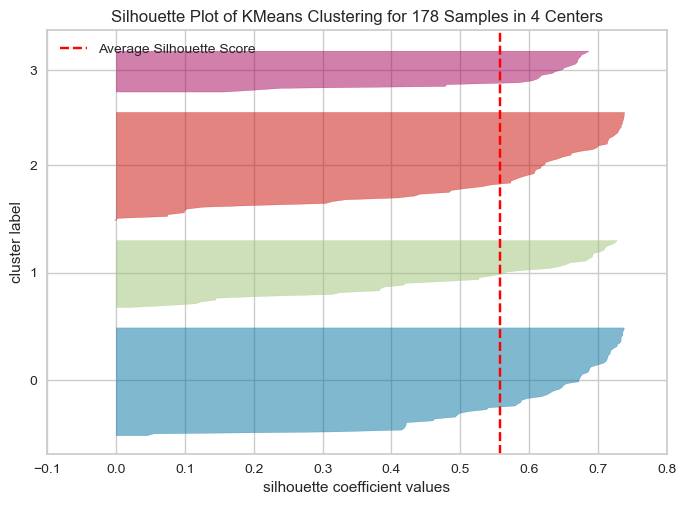

In [20]:
visualizer=SilhouetteVisualizer(KM,colors='yellowbrick')
visualizer.fit(data.drop(columns='cluster_id'))
visualizer.show();

In [21]:
data.cluster_id.value_counts().to_frame()

,cluster_id
2,59
0,59
1,37
3,23
